In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df= pd.read_csv('soccer_all_data.csv',header=0,usecols=[0,1,2,3,6,9,10,11,12,13,14,15,16,17,18,19,20],skiprows=[0,1])
#csvファイルの読み込み

In [4]:
df
#ファイルの確認

,Year,Section,name of me,name of opponent,"score(win=3,draw=1,lose=0)",mean score(compatibility),mean gain points(compatibility),mean lose points(compatibility),Home/Away,score of last year(me),mean score points in last five games(me),total market value(me),mean age(me),number of foreign people(me),score of last year(opponent),total market value(opponent),mean age(opponent)
0,2017,7,FC東京,浦和,0,0.895833,1.0,1.6,H,46,1.4,1.127203,24.2,6,66,1.322053,26.5
1,2017,9,FC東京,広島,3,1.272727,1.2,1.3,H,46,1.4,1.127203,24.2,6,58,1.288802,25.9
2,2017,11,FC東京,柏,0,1.395833,1.4,1.2,H,46,1.8,1.127203,24.2,6,48,0.911073,23.2
3,2017,13,FC東京,甲府,1,2.181818,1.7,0.7,H,46,2.0,1.127203,24.2,6,30,0.577234,26.7
4,2017,15,FC東京,横浜FM,0,1.372549,1.2,1.2,H,46,1.6,1.127203,24.2,6,44,0.901097,23.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2021,6,大分,広島,0,0.947368,0.8,1.1,H,43,1.2,0.671761,26.4,2,48,0.967387,27.3
1172,2021,9,大分,名古屋,0,1.033333,1.0,1.3,H,43,0.2,0.671761,26.4,2,63,1.099475,27.1
1173,2021,10,大分,柏,0,1.166667,0.8,0.9,H,43,0.0,0.671761,26.4,2,52,1.187533,26.0
1174,2021,12,大分,清水,3,1.320000,1.4,1.5,H,43,0.0,0.671761,26.4,2,28,1.100104,26.5


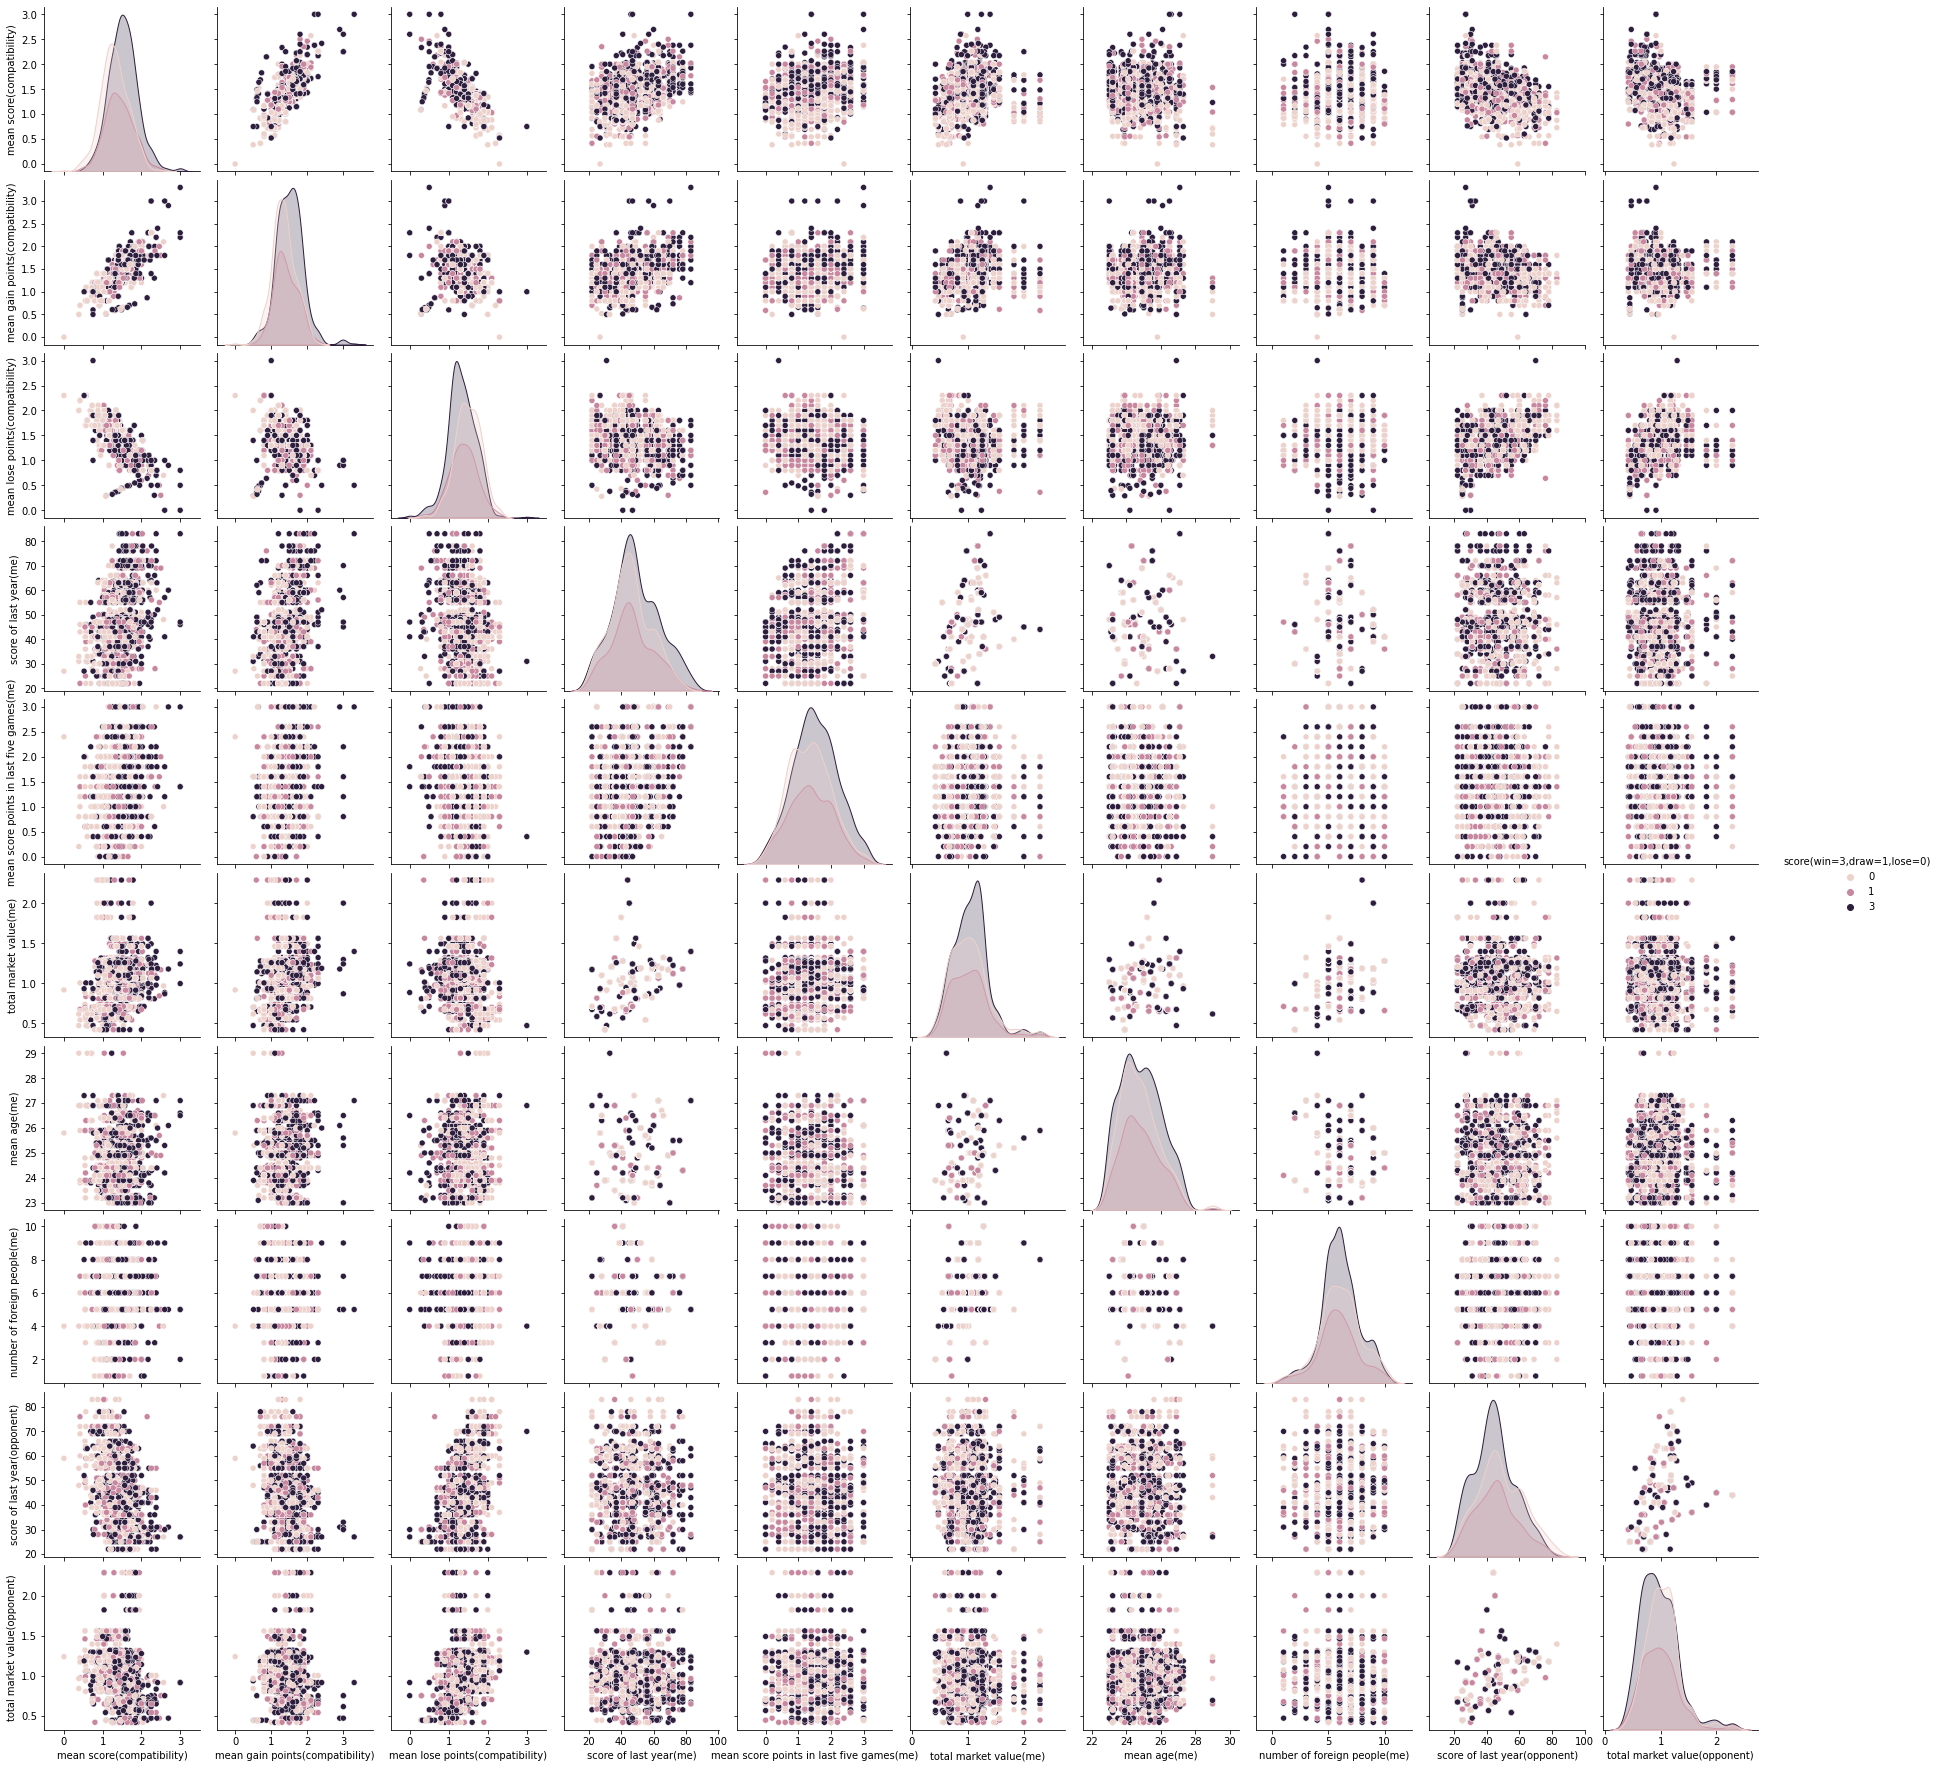

In [5]:
import matplotlib.pyplot as plt
sns.pairplot(df.iloc[:,4:16], hue ="score(win=3,draw=1,lose=0)")
plt.show()
#それぞれの説明変数がどれだけ勝敗，引き分けに影響をしているかグラフを通して確認
#3はホームチームの勝利,1は引き分け,0は負けを示している

In [6]:
x= pd.read_csv('soccer_all_data.csv',header=0,usecols=[9,10,11,13,14,15,16,17,18,19,20],skiprows=[0,1])
y = pd.read_csv('soccer_all_data.csv',header=0,usecols=[6],skiprows=[0,1])
#説明変数，目的変数のデータを分けて読み込み

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#データ分析のためのモジュールを読み込み，データを学習データとテストデータに分類

In [8]:
x_train
#説明変数の学習データの確認

,mean score(compatibility),mean gain points(compatibility),mean lose points(compatibility),score of last year(me),mean score points in last five games(me),total market value(me),mean age(me),number of foreign people(me),score of last year(opponent),total market value(opponent),mean age(opponent)
634,1.035714,1.400000,2.000000,46,1.8,1.005329,23.9,9,47,1.233579,24.5
597,1.571429,1.400000,1.100000,22,2.4,0.673662,26.9,7,34,1.207005,24.9
342,0.956522,1.200000,1.700000,47,2.0,1.233579,24.5,5,55,0.842732,25.7
861,1.716981,1.500000,1.100000,63,2.0,1.064315,24.4,5,59,1.187416,23.7
1051,1.485294,0.602941,0.441176,62,1.2,0.904537,24.2,7,25,0.446671,25.2
...,...,...,...,...,...,...,...,...,...,...,...
1033,1.111111,1.300000,1.300000,48,1.4,0.911073,23.2,6,34,1.207005,24.9
763,1.203704,1.200000,1.400000,49,1.8,0.810801,24.4,7,50,0.806397,23.2
835,1.736111,1.500000,1.200000,56,2.0,1.061252,24.4,6,57,0.868597,25.3
559,1.111111,1.200000,1.500000,55,1.0,0.842732,25.7,4,63,1.064315,24.4


In [9]:
x_test
#説明変数のテストデータの確認

,mean score(compatibility),mean gain points(compatibility),mean lose points(compatibility),score of last year(me),mean score points in last five games(me),total market value(me),mean age(me),number of foreign people(me),score of last year(opponent),total market value(opponent),mean age(opponent)
483,1.786667,1.8,1.4,41,1.2,0.885111,24.2,9,57,0.868597,25.3
932,1.277778,0.9,1.3,36,0.6,0.659106,24.4,10,37,1.258200,24.9
1169,1.437500,1.1,0.8,43,1.2,0.671761,26.4,2,27,0.917068,25.8
682,0.542857,1.0,2.3,41,1.2,0.701237,23.9,5,49,1.563347,26.3
192,1.342857,1.8,2.0,50,1.4,1.179597,24.8,9,69,1.169689,24.9
...,...,...,...,...,...,...,...,...,...,...,...
829,1.939394,1.8,1.2,56,1.6,1.061252,24.4,6,41,0.566955,23.2
45,1.272727,1.2,1.3,50,2.4,0.806397,23.2,8,57,0.868597,25.3
412,1.333333,1.4,1.6,51,1.0,1.463075,24.9,5,69,1.169689,24.9
947,1.078947,1.4,1.7,25,1.4,0.585150,24.2,4,62,0.904537,24.2


In [10]:
lr=LogisticRegression(max_iter=10000,multi_class='multinomial')
lr.fit(x_train,y_train)
#多項ロジスティック回帰分析を学習データに対して実行

C:\Users\81702\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [11]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
#判別的中率を学習データとテストデータに関して確認
#結果，両方に対して的中率は50％を超えることができた

0.5010638297872341
0.5084745762711864


In [12]:
print(lr.coef_)
print(lr.intercept_)
#回帰係数を確認

[[-5.87653561e-01 -2.05526254e-01  2.63324115e-01  1.30949749e-03
  -9.07891561e-02  2.30018854e-01 -7.64270104e-02  1.58181468e-02
   8.90826468e-04  1.68996771e-01 -4.35363687e-02]
 [ 1.49540716e-01 -7.26571054e-02 -1.52891527e-01 -1.44077660e-03
  -4.73780005e-02 -1.45063333e-01 -1.03023217e-04 -4.10209035e-02
  -1.64765176e-03 -1.19574090e-01  2.48584287e-02]
 [ 4.38112845e-01  2.78183359e-01 -1.10432589e-01  1.31279112e-04
   1.38167157e-01 -8.49555210e-02  7.65300336e-02  2.52027567e-02
   7.56825288e-04 -4.94226810e-02  1.86779400e-02]]
[ 3.29243868 -0.085358   -3.20708068]


In [13]:
lr.classes_

array([0, 1, 3], dtype=int64)